In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.neighbors import KNeighborsClassifier
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\taewoo\Desktop\Datasets\autos.csv", encoding='latin-1')
print(df.head())

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

### Data cleansing process #1
There are some irrelevant columns for price prediction.

I'm going to drop `dateCrawled`, `nrOfPictures`, `postalCode`, `lastSeen`, `abtest`, `offerType`, `seller`, `dateCreated`.

In [5]:
df = df.drop(columns=['dateCrawled', 'nrOfPictures', 'postalCode', 'lastSeen', 
                      'monthOfRegistration', 'abtest', 'offerType', 'seller', 'dateCreated'])
print(df.columns)

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')


In [6]:
columns = list(df.columns)
for item in columns:
    print(f'========\n Unique Values of {item} are: {df[item].unique()}')

 Unique Values of name are: ['Golf_3_1.6' 'A5_Sportback_2.7_Tdi' 'Jeep_Grand_Cherokee_"Overland"' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']
 Unique Values of price are: [  480 18300  9800 ... 18429 24895 10985]
 Unique Values of vehicleType are: [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
 Unique Values of yearOfRegistration are: [1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1111
 1969 1971 1987 1986 1988 1967 1970 1965 1945 1925 1974 1979 1955 1978
 1972 1977 1961 1963 1964 1960 1966 1975 1937 1936 5000 1954 1958 9999
 1956 3200 1000 1933 1941 1962 8888 1500 2200 4100 1929 1951 1957 1940
 3000 2066 1949 2019 1800 1953 1935 1234 8000 5300 9000 2900 6000 5900
 5911 1400 1950 4000 1948 1952 1200 8500 1932 1255 1927 1923

 'land_rover' 'lada']
 Unique Values of notRepairedDamage are: [nan 'ja' 'nein']


I have noticed some values from `yearOfRegistration` are over __2020__ (current year), so I need to investigate.

In [7]:
year_temp = df.loc[df['yearOfRegistration'] > 2020]
print(Counter(year_temp['yearOfRegistration']))

Counter({9999: 27, 5000: 18, 3000: 7, 6000: 6, 9000: 5, 7000: 4, 2500: 4, 4000: 3, 8888: 2, 8000: 2, 5911: 2, 2800: 2, 7500: 2, 5555: 2, 2222: 2, 4500: 2, 3200: 1, 2200: 1, 4100: 1, 2066: 1, 5300: 1, 2900: 1, 5900: 1, 8500: 1, 3700: 1, 3800: 1, 4800: 1, 6500: 1, 2290: 1, 6200: 1, 9450: 1, 7777: 1, 5600: 1, 9996: 1, 8455: 1, 7800: 1, 9229: 1, 7100: 1, 8200: 1, 3500: 1})


### Data cleansing process #2
As seen from above, there are too many extreme values. Therefore, I need to add filters to the dataframe before I build any model.

Let's try to set some arbitrary ranges for columns with numerical values to make a relevance frame.

* `price`: 200-14000 ($)
* `yearOfRegistration`: 1980-2020 (yr)
* `powerPS`: 20-400 (hp)
* `kilometer`: 5,000-200,000 (km)

In [8]:
# Adding filters
filtered_df = df.loc[(df['price']<=14000)&(df['price']>=200)&(df['yearOfRegistration']>=1980)&(df['yearOfRegistration']<=2020)
                    &(df['powerPS']>=20)&(df['powerPS']<=400)&(df['kilometer']>=5000)&(df['kilometer']<=200000)]

# Replace NaN values with 'Uncertain' and remove duplciates
filtered_df = filtered_df.fillna('Uncertain')
filtered_df = filtered_df.drop_duplicates(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox', 
                                           'powerPS', 'model', 'kilometer', 'fuelType',
                                           'brand', 'notRepairedDamage'])

print(f'{round((1-filtered_df.name.count()/df.name.count())*100)}% of the original dataset has been filtered out\n========')
print(f'filtered_df is using {round(filtered_df.name.count()/df.name.count()*100)}% of the original dataset')

27% of the original dataset has been filtered out
filtered_df is using 73% of the original dataset


In [9]:
filtered_df.shape

(272947, 11)

### Data cleansing process #3


In [10]:
print(list(filtered_df.columns))

['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage']


In [11]:
# It's the same as:
# for col in list(filtered_df.columns):
#     filtered_df[col] = filtered_df[col].astype('category').cat.codes
filtered_df = filtered_df.apply(preprocessing.LabelEncoder().fit_transform)

I changed strings to numerical values before making a correlation table

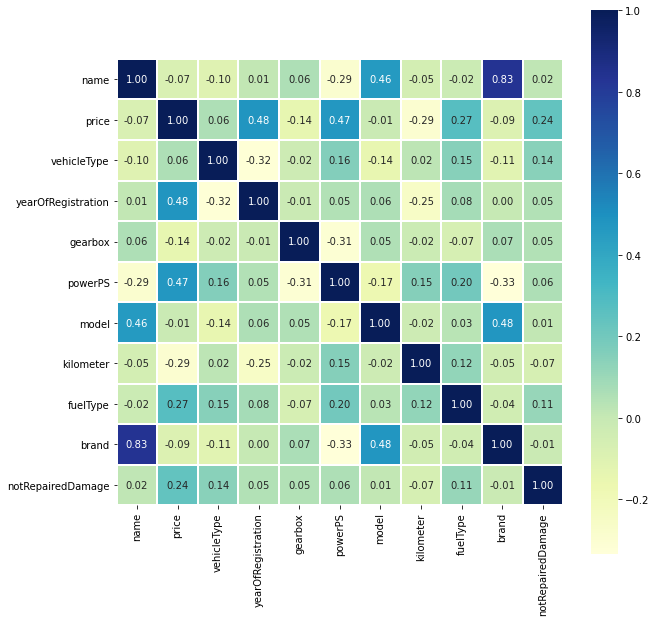

In [12]:
filtered_corr = filtered_df.corr()
plt.figure(figsize =(10, 10))
sns.heatmap(data=filtered_corr, cmap='YlGnBu', fmt=".2f",
            linewidth=1, square=True, annot=True)
plt.show()

In [13]:
filtered_corr['price'].abs().sort_values(ascending=False)

price                 1.000000
yearOfRegistration    0.481725
powerPS               0.468618
kilometer             0.292516
fuelType              0.271449
notRepairedDamage     0.240628
gearbox               0.137887
brand                 0.091110
name                  0.074826
vehicleType           0.058543
model                 0.013796
Name: price, dtype: float64

##### Correlation Matrix
The matrix shows correlations between `price` and independent variables.

As seen above, `yearOfRegistration`, `powerPS`, `kilometer`, `fuelType` and `notRepairedDamage` are five independent variables that have moderate/great influence on price of vehicles.

I am surprised to see `brand` and `model` having such low influence on price. In fact, I don't know why they hold such low significance on determining a vehicle's price.

That makes me wonder, how **accurate** is this model?

##### Using linear regression to determine the model's accuracy

In [14]:
X = np.array(filtered_df.drop(columns='price'))
y = np.array(filtered_df['price'])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
mode = KNeighborsClassifier(n_neighbors=5)
acc = linear.score(X_train, y_train)
print(f"This model's accurary is {round(acc*100, 2)}%")

This model's accurary is 56.12%



56% is definitely not enough to make a good prediction, I may have to choose a different model

In [15]:
prediction = linear.predict(X_test)
print('Printing 15 samples \n========')
for i in range(15):
    print(f'Predicted Value:{round(prediction[i], 2)}, Actual Value: {y_test[i]}')

Printing 15 samples 
Predicted Value:1841.54, Actual Value: 1789
Predicted Value:775.45, Actual Value: 1134
Predicted Value:443.11, Actual Value: 257
Predicted Value:1052.78, Actual Value: 548
Predicted Value:1381.49, Actual Value: 997
Predicted Value:1186.14, Actual Value: 1727
Predicted Value:1260.12, Actual Value: 1041
Predicted Value:-106.39, Actual Value: 187
Predicted Value:1809.52, Actual Value: 2800
Predicted Value:1838.19, Actual Value: 2222
Predicted Value:2337.19, Actual Value: 2918
Predicted Value:1528.82, Actual Value: 1394
Predicted Value:1748.27, Actual Value: 926
Predicted Value:1212.53, Actual Value: 1345
Predicted Value:1788.75, Actual Value: 1851


##### Progression and my thoughts:

* By building a correlation matrix, I was able to evaluate `yearOfRegistration`, `powerPS`, `kilometer`, `fuelType` and `notRepairedDamage` as the more relevant variables when predicting a vehicle's price.

* However, the accurary of the model was 56% (linear regression), which makes me question the significance of the values of correlation. 

* Predicted values were not close when compared to actual values.

* Predictions will not be reliable with linear regression


__How do I improve accuracy?__

What if I drop rows with NaN values and recalculate the accuracy?

In [16]:
new_filtered_df = df.loc[(df['price']<=14000)&(df['price']>=200)&(df['yearOfRegistration']>=1980)&(df['yearOfRegistration']<=2020)
                    &(df['powerPS']>=20)&(df['powerPS']<=400)&(df['kilometer']>=5000)&(df['kilometer']<=200000)]
# Also remove duplciates
new_filtered_df = new_filtered_df.drop_duplicates(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox', 
                                           'powerPS', 'model', 'kilometer', 'fuelType',
                                           'brand', 'notRepairedDamage'])
new_filtered_df.dropna(inplace=True)
print(f'{round((1-new_filtered_df.name.count()/df.name.count())*100)}% of the original dataset has been filtered out\n========')
print(f'new_filtered_df is using {round(new_filtered_df.name.count()/df.name.count()*100)}% of the original dataset')

45% of the original dataset has been filtered out
new_filtered_df is using 55% of the original dataset


I've already faced a problem of filtering out 45% of the original data.

In [17]:
for col in list(new_filtered_df.columns):
    new_filtered_df[col] = new_filtered_df[col].astype('category').cat.codes
    
X = np.array(new_filtered_df.drop(columns='price'))
y = np.array(new_filtered_df['price'])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
acc = linear.score(X_train, y_train)

print(f"This model's accurary = {round(acc*100, 2)}%")

This model's accurary = 65.52%


##### Feedback
The accuracy went up by 9%; however, it's still not good enough to make a good prediction.

As I have cleaned the data before training the model, the cause of such low accuracy is probably my attempt to make a prediction of complex data with a simple implementation of linear agression. Moreover, there seems to be too much *noise*. 

To make a better prediction, let's go back to our initial filtered data and use a random forest regressor model.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math


X = np.array(filtered_df.drop(columns='price'))
y = np.array(filtered_df['price'])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
model = RandomForestRegressor(50)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Accuracy of the model on learned data: {model.score(X_train, y_train)}')
print(f'Accuracy of the model on new data: {model.score(X_test, y_test)}')
print(f'RMSE of the model: {round(math.sqrt(mean_squared_error(y_test, prediction)), 2)}$')

Accuracy of the model on learned data: 0.9722370094454125
Accuracy of the model on new data: 0.8584174332838488
RMSE of the model: 297.13$


The model performs extremely well with the learned data (train), but not as well with new data (test); however, it's a significant improvement from the linear regression model

86% is far more workable than 56% or 65%. 

In [20]:
print('Printing 20 samples \n========')
for i in range(20):
    print(
        ('Predicted Value:{}, Actual Value:{}, Difference:{}%').
         format(round(prediction[i], 2), y_test[i], abs(round((y_test[i]-prediction[i])/y_test[i]*100, 2)))
    )

Printing 20 samples 
Predicted Value:195.0, Actual Value:103, Difference:89.32%
Predicted Value:785.11, Actual Value:922, Difference:14.85%
Predicted Value:2348.14, Actual Value:2065, Difference:13.71%
Predicted Value:304.08, Actual Value:103, Difference:195.22%
Predicted Value:1795.38, Actual Value:2282, Difference:21.32%
Predicted Value:516.66, Actual Value:257, Difference:101.03%
Predicted Value:1880.06, Actual Value:1898, Difference:0.95%
Predicted Value:206.05, Actual Value:213, Difference:3.26%
Predicted Value:876.16, Actual Value:680, Difference:28.85%
Predicted Value:1041.54, Actual Value:984, Difference:5.85%
Predicted Value:1601.68, Actual Value:1545, Difference:3.67%
Predicted Value:1288.46, Actual Value:1882, Difference:31.54%
Predicted Value:1604.24, Actual Value:1898, Difference:15.48%
Predicted Value:2107.34, Actual Value:2500, Difference:15.71%
Predicted Value:1872.14, Actual Value:1135, Difference:64.95%
Predicted Value:2532.34, Actual Value:2500, Difference:1.29%
Pred

### Observation & Conclusion

* It's extremely difficult to build a price prediction model for vehicles as there are thousands of varying types.

* If vehicles were of the same brand or the same model, I believe the accuracy of the model would've been highly improved.

* It is important to choose which model to use - In my case, random forest regressor was quite effective

* A model's score doesn't fully juistify how well it can make predictions